In [1]:
from numpy import loadtxt
from pandas import read_csv
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [3]:
dataframe = read_csv('resources/websites_full.csv', delimiter=',', index_col=0).set_index('url')
#dataframe = dataframe.groupby('https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html').sum()
dataframe

,exclamation_count,words_to_avoid_count,smart_words_count,h1_count,h2_count,div_count,iframe_count,a_count,img_count,p_count,...,ylt_cssDuplicatedProperties,ylt_totalWeight,ylt_domains,ylt_compression,ylt_totalRequests,ylt_heavyFonts,ylt_global_score,ylt_badJavascript_score,ylt_jQuery_score,ylt_serverConfig_score
url,,,,,,,,,,,,,,,,,,,,,
https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html,13,15,14,1,1,387,4,275,5,89,...,479,3402031,39,458049,138,36064,13,97,70,40
https://edition.cnn.com/2021/09/06/americas/columbus-statue-indigenous-woman-mexico-city-cec/index.html,4,11,0,1,0,210,3,253,7,11,...,479,3548487,39,458831,134,41216,19,97,70,42
https://edition.cnn.com/2021/09/06/entertainment/stanley-tucci-cancer/index.html,8,9,14,1,2,401,4,271,6,90,...,587,4748839,41,598947,163,54200,22,97,70,35
https://edition.cnn.com/2021/09/06/world/perseverance-rover-mars-sample-helicopter-scn/index.html,11,11,4,1,1,295,3,256,14,17,...,542,3988747,42,594764,156,36064,14,97,70,33
https://www.bbc.com/news/av/world-asia-india-58498881,10,2,1,1,4,246,1,104,15,203,...,16,1275281,17,49244,56,134516,82,100,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://americasfreedomfighters.com/fda-makes/,153,22,2,3,8,192,20,124,37,80,...,119,3506248,56,169485,263,25664,17,20,-200,20
https://americasfreedomfighters.com/man-has-to-say/,113,18,0,3,2,192,21,113,37,76,...,127,4411248,63,240498,279,25664,11,20,-200,21
https://americasfreedomfighters.com/texas-they-got-son/,140,3,6,4,2,195,20,114,37,81,...,119,3675811,57,237474,263,25664,17,20,-200,21


In [6]:
fake = pd.read_csv('resources/training_data/not_that_legit.txt', names=["url"])
true = pd.read_csv('resources/training_data/legit.txt', names=["url"])
fake['label'] = 1
true['label'] = 0
fake = fake.append(true)
fake = fake.sort_values(by=['url'], ignore_index=True)
labels = fake['label']
fake = fake.set_index('url')
df_final = dataframe.merge(fake, left_on='url', right_on='url')

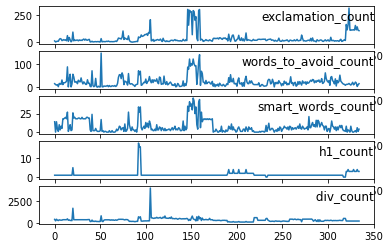

In [7]:
dataset = dataframe.values
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(dataset[:, group])
    pyplot.title(dataframe.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [2]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [9]:
df = df_final.copy()
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.describe()
dataset = normalized_df.values

In [10]:
df

,exclamation_count,words_to_avoid_count,smart_words_count,h1_count,h2_count,div_count,iframe_count,a_count,img_count,p_count,...,ylt_totalWeight,ylt_domains,ylt_compression,ylt_totalRequests,ylt_heavyFonts,ylt_global_score,ylt_badJavascript_score,ylt_jQuery_score,ylt_serverConfig_score,label
url,,,,,,,,,,,,,,,,,,,,,
https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html,13,15,14,1,1,387,4,275,5,89,...,3402031,39,458049,138,36064,13,97,70,40,0
https://edition.cnn.com/2021/09/06/americas/columbus-statue-indigenous-woman-mexico-city-cec/index.html,4,11,0,1,0,210,3,253,7,11,...,3548487,39,458831,134,41216,19,97,70,42,0
https://edition.cnn.com/2021/09/06/entertainment/stanley-tucci-cancer/index.html,8,9,14,1,2,401,4,271,6,90,...,4748839,41,598947,163,54200,22,97,70,35,0
https://edition.cnn.com/2021/09/06/world/perseverance-rover-mars-sample-helicopter-scn/index.html,11,11,4,1,1,295,3,256,14,17,...,3988747,42,594764,156,36064,14,97,70,33,0
https://www.bbc.com/news/av/world-asia-india-58498881,10,2,1,1,4,246,1,104,15,203,...,1275281,17,49244,56,134516,82,100,100,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://americasfreedomfighters.com/fda-makes/,153,22,2,3,8,192,20,124,37,80,...,3506248,56,169485,263,25664,17,20,-200,20,1
https://americasfreedomfighters.com/man-has-to-say/,113,18,0,3,2,192,21,113,37,76,...,4411248,63,240498,279,25664,11,20,-200,21,1
https://americasfreedomfighters.com/texas-they-got-son/,140,3,6,4,2,195,20,114,37,81,...,3675811,57,237474,263,25664,17,20,-200,21,1


In [13]:
df = pd.read_csv('resources/websites_after_changes.csv',delimiter=',', index_col=0)
dataset = df.values.astype('float64')
X, y = dataset[:,:-1], dataset[:,-1]
n_features = X.shape

y = LabelEncoder().fit_transform(y)
n_class = len(unique(y))
# Separate the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Split the remaining data to train and validation
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)
# definiowanie modeli
model = Sequential()
model.add(Embedding(100,64,input_length = 40))
model.add(LSTM(units = 256, return_sequences=True))
model.add(LSTM(units=256))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(units=2,activation = 'softmax'))
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.005)
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
# dopasowanie
history = model.fit(X_train, y_train, epochs=150, batch_size=150, validation_split=0.25)

yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Epoch 1/150
2/2 [==============================] - 6s 1s/step - loss: 0.6932 - acc: 0.5025 - val_loss: 0.6863 - val_acc: 0.6029
Epoch 2/150
2/2 [==============================] - 1s 489ms/step - loss: 0.6905 - acc: 0.5423 - val_loss: 0.6773 - val_acc: 0.6029
Epoch 3/150
2/2 [==============================] - 1s 539ms/step - loss: 0.6901 - acc: 0.5423 - val_loss: 0.6760 - val_acc: 0.6029
Epoch 4/150


KeyboardInterrupt: 

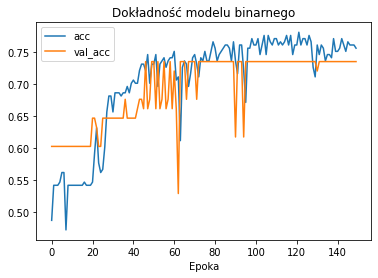

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Dokładność modelu binarnego')
plt.xlabel('Epoka')
plt.legend(['acc', 'val_acc'], loc='best')
plt.show()

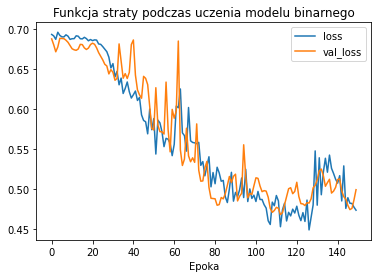

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funkcja straty podczas uczenia modelu binarnego')
plt.xlabel('Epoka')
plt.legend(['loss', 'val_loss'], loc='best')
plt.show()

array([[0.81382979, 0.18617021],
       [0.32214765, 0.67785235]])

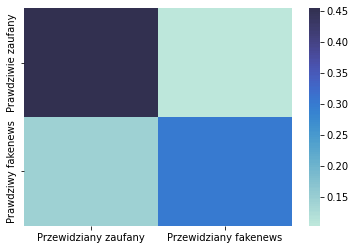

In [51]:
import seaborn as sns
yhat = model.predict(X)
yhat = argmax(yhat, axis=-1).astype('int')
#acc = accuracy_score(y_test, yhat)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, yhat, normalize='all'), xticklabels=['Przewidziany zaufany','Przewidziany fakenews' ], yticklabels=['Prawdziwie zaufany','Prawdziwy fakenews'], center=.55)
confusion_matrix(y, yhat, normalize='true')

In [19]:
model.save('models/acc70_binary')
model.summary()

INFO:tensorflow:Assets written to: models/acc70_binary\assets


INFO:tensorflow:Assets written to: models/acc70_binary\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 64)            6400      
                                                                 
 lstm_2 (LSTM)               (None, 40, 256)           328704    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              